This notebook was used to create imageConverter.py

only included to kinda show thought process.

In [55]:
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
a = Image.open("img.png")


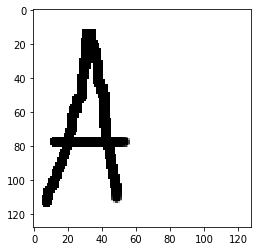

In [56]:
plt.imshow(a, cmap='gray',interpolation='nearest')
plt.show()

In [57]:
a = ImageOps.grayscale(a)

In [58]:
#invert
a = ImageOps.invert(a)

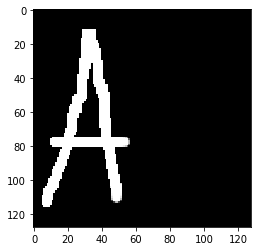

In [59]:
plt.imshow(a, cmap='gray',interpolation='nearest')
plt.show()

In [60]:
#to array
import numpy as np
array = np.asarray(a)
print(array.shape)

(128, 128)


In [61]:
#gaussian filter
from scipy.ndimage import gaussian_filter
arrayGau = gaussian_filter(array,sigma = 1)

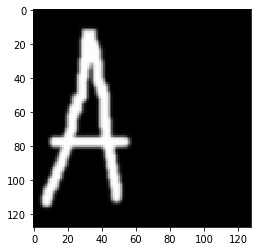

In [62]:

plt.imshow(arrayGau, cmap='gray',interpolation='nearest')
plt.show()
#Fix so that it shows in greyscale too
#There is no color in array, so it picks "random" color

In [63]:
#find leftmost non zero value
#and right, and up, and left

print(arrayGau.shape)
print(array.shape)

topMost = -1
bottomMost = -1
rightMost = -1
leftMost = -1

#left to right
for x in range(128):
    for y in range(128):

        #save first non zero value (top)
        if not arrayGau[x][y] == 0 and topMost == -1:
            topMost = (x,y)

        #save last non zero value (bottom)
        if not arrayGau[x][y] == 0:
            bottomMost = (x,y)

#top to bottom
for x in range(128):
    for y in range(128):

        #save first non zero value (left)
        if not arrayGau[y][x] == 0 and leftMost == -1:
            leftMost = (x,y)

        #save last non zero value (right)
        if not arrayGau[y][x] == 0:
            rightMost = (x,y)


print(topMost, "topMost", bottomMost , "bottomMost", leftMost, "leftMost", rightMost, "rightMost")
    
        

(128, 128)
(128, 128)
(10, 28) topMost (117, 11) bottomMost (2, 110) leftMost (58, 80) rightMost


In [64]:
#Find paddin
heigth = abs(topMost[0] - bottomMost[0])
width = abs(leftMost[0] - rightMost[0])
print(heigth, "heigth")
print(width , "width")

#heigth is more, change width both sides
if heigth > width:
    padding = (heigth - abs(rightMost[0]-leftMost[0]))//2
    #add padding to width
    newArray = np.zeros(shape=(heigth,heigth))
    for x in range(width+1):
        for y in range(heigth):
            # newArray[topMost[0] + x][padding +y] = 1
            newArray[y][padding + x] = arrayGau[y+ topMost[0]][x + leftMost[0]]

elif heigth < width:
    padding = (width - abs(bottomMost[0]-topMost[0]+1))//2
    #add padding to width
    newArray = np.zeros(shape=(width,width))
    for x in range(width):
        for y in range(heigth+1):
            # newArray[padding + y][x] = 1
            newArray[padding + y][x] = arrayGau[y+ topMost[0]][x+leftMost[0]]

print(np.shape(newArray))

print(padding, "padding")
print(heigth, "heigth")
print(width , "width")

107 heigth
56 width
(107, 107)
25 padding
107 heigth
56 width


In [65]:
print(topMost, bottomMost, leftMost, rightMost)

(10, 28) (117, 11) (2, 110) (58, 80)


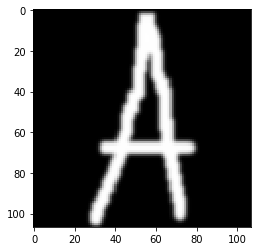

(107, 107)
378902.0


In [66]:
plt.imshow(newArray, cmap='gray',interpolation='nearest')
plt.show()
print(newArray.shape)
print(newArray.sum())

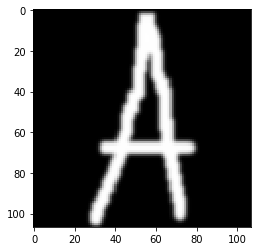

(107, 107)


In [67]:
#Test
reducedArrayTest = newArray
plt.imshow(reducedArrayTest, cmap='gray',interpolation='nearest')
plt.show()
print(reducedArrayTest.shape)

In [68]:
#reduce matrix
arrayGau = newArray
reducedArray = arrayGau

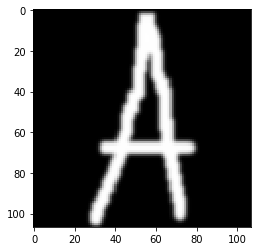

(107, 107)


In [69]:
plt.imshow(reducedArray, cmap='gray',interpolation='nearest')
plt.show()
print(reducedArray.shape)

In [70]:
import cv2
img_resized = cv2.resize(reducedArray, dsize=[28,28] ,fx=0, fy=0, interpolation=cv2.INTER_CUBIC)

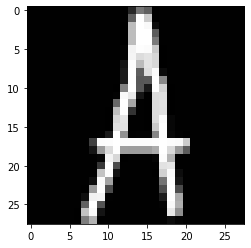

(28, 28)


In [71]:
plt.imshow(img_resized, cmap='gray',interpolation='nearest')
plt.show()
print(img_resized.shape)

In [72]:
from joblib import dump, load

In [73]:
clf1 = load('neuralNetModel.joblib') 
flatImg = img_resized.reshape(1,-1)

print(flatImg.shape)
pred = clf1.predict(flatImg)

print(pred)

numbers = [0,1,2,3,4,5,6,7,8,9]
upper = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
lower = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
targetLabels = numbers + upper + lower
print(targetLabels[pred[0]])

(1, 784)
[10]
A
